In [1]:
import sys, os
import pandas as pd
import numpy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.system('python bin-script.py dating.csv dating-binned.csv 5 > /dev/null')
os.system('python split.py')

TRAINING_SET = 'trainingSet.csv'
TEST_SET = 'testSet.csv'
bin_N = 5
F = [0.01, 0.1, 0.2, 0.5, 0.6, 0.75, 0.9, 1]
#F = [0.01]
def nbc(t_frac):
    df_train = pd.read_csv(TRAINING_SET).sample(frac=1, random_state=47)
    df_test = pd.read_csv(TEST_SET).sample(frac=1, random_state=47)
    
    attr_list = list(df_train[df_train.columns.difference(['decision'])])
    dict_table ={}
    
    df_t = pd.read_csv(TRAINING_SET).sample(frac=f, random_state=47)

    # Labels
    dict_labels = {}
    dict_labels['no'] = len(df_t[df_t['decision'] == 0])
    dict_labels['yes'] = len(df_t[df_t['decision'] == 1])
    dict_table['decision'] = dict_labels
    
    # Attributes in discrete_columns
    for attr in attr_list:
        dict_attr = {}
        attr_bin = max(int(df_train[attr].max()), int(df_test[attr].max()))
        
        dict_attr['no'] = [0 for i in range(attr_bin + 1)]
        dict_attr['yes'] = [0 for i in range(attr_bin + 1)]
        
        for i in range(attr_bin+1):
            dict_attr['no'][i] += len(df_t[(df_t[attr] == i) & (df_t['decision'] == 0)])
            dict_attr['yes'][i] += len(df_t[(df_t[attr] == i) & (df_t['decision'] == 1)])

        dict_table[attr] = dict_attr
        
    return dict_table

In [3]:
A_train = []
A_test = []

for f in F:
    # Print the accuracy
    print 'f =', f
    dict_table = nbc(f)
    #print dict_table
    
    # Accuracy on training data
    df = pd.read_csv(TRAINING_SET).sample(frac=f, random_state=47)
    (row, col) = df.shape
    attr_list = list(df[df.columns.difference(['decision'])])
    
    neg_num = len(df[df['decision'] == 0])
    pos_num = len(df[df['decision'] == 1])
    
    correct = 0
    row_index = df.index.tolist()

    #for i in range(row):
    for i in row_index:
        pd_pos = 1.0 * dict_table['decision']['yes']/row
        pd_neg = 1.0 * dict_table['decision']['no']/row
        for attr in attr_list:
            pd_pos *= 10.0 * dict_table[attr]['yes'][int(df[attr][i])]/pos_num
            pd_neg *= 10.0 * dict_table[attr]['no'][int(df[attr][i])]/neg_num
        
        res = np.argmax([1.0 * pd_neg, 1.0 * pd_pos])
        if res == df['decision'][i]:
            correct += 1

    training_accuracy = 1.0 * correct/row
    print 'Training Accuracy:', '%.2f' % training_accuracy
    A_train.append(training_accuracy)
    
    # Accuracy on test data
    df_test = pd.read_csv(TEST_SET).sample(frac=1, random_state=47)
    (row_test, col_test) = df_test.shape
    
    row_index_test = df_test.index.tolist()

    correct = 0
    for i in row_index_test:
        pd_pos = 1.0 * dict_table['decision']['yes']/row
        pd_neg = 1.0 * dict_table['decision']['no']/row
        #print pd_pos, pd_neg
        for attr in attr_list:
            pd_pos *= 1.0 * dict_table[attr]['yes'][int(df_test[attr][i])]/pos_num
            pd_neg *= 1.0 * dict_table[attr]['no'][int(df_test[attr][i])]/neg_num
        
        res = np.argmax([1.0 * pd_neg, 1.0 * pd_pos])
        if res == df_test['decision'][i]:
            correct += 1
    test_accuracy = 1.0 * correct/row_test
    print 'Test Accuracy:', '%.2f' % test_accuracy
    A_test.append(test_accuracy)

f = 0.01
Training Accuracy: 1.00
Test Accuracy: 0.59
f = 0.1
Training Accuracy: 0.87
Test Accuracy: 0.70
f = 0.2
Training Accuracy: 0.80
Test Accuracy: 0.72
f = 0.5
Training Accuracy: 0.79
Test Accuracy: 0.74
f = 0.6
Training Accuracy: 0.79
Test Accuracy: 0.74
f = 0.75
Training Accuracy: 0.78
Test Accuracy: 0.75
f = 0.9
Training Accuracy: 0.78
Test Accuracy: 0.75
f = 1
Training Accuracy: 0.78
Test Accuracy: 0.75


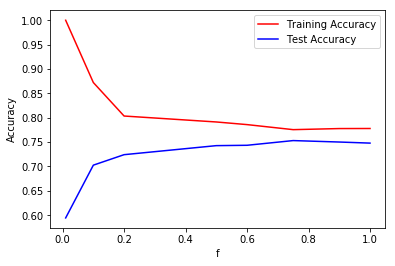

In [4]:
fig = plt.figure()
plt.plot(F, A_train, color='red', label='Training Accuracy')
plt.plot(F, A_test, color='blue', label='Test Accuracy')

plt.xlabel("f")
plt.ylabel("Accuracy");
plt.legend()

plt.savefig('./figs/5_3.png')
plt.show()